In [218]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from time import process_time

np.random.seed(1337)

def tic():
  global ticc
  ticc=process_time()

def toc():
  tocc=process_time()
  print("\nTime elapsed: ",(tocc-ticc)) #easily measure time spent

In [225]:
#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#turn Nx28x28 array into Nx784 and into matlab double
x_train = x_train.reshape(60000, 784).astype('float64')
x_test = x_test.reshape(10000, 784).astype('float64')

#add train and test for more data
#x_data=np.vstack((x_train,x_test))

x_data=np.array(x_train)

#dimensions
K=10
N=x_data.shape[0]
d=x_data.shape[1]

In [226]:
# Normalize data
x_data=x_data/np.amax(x_data)

# Shuffle data
#np.random.shuffle(x_data)

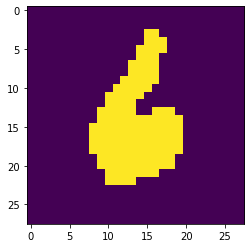

In [227]:
# Make pixel values either 0 or 1 (sharpen)
x_data[np.where(x_data<0.5)]=0
x_data[np.where(x_data>=0.5)]=1

# Like this
plt.imshow(x_data[1337].reshape(28,28))

Vector Multinomial

In [228]:
def multinom(x,mu,pi_k):
  """Gives p(x|k)"""
  z=(mu**x)*((1-mu)**(1-x))
  return z#/sum(z)

1. Initialize $\pi_{k}, \mu_{jk}$ random.

2. For t = 1, 2 . . . ,

(a) For $\mu$ = 1, . . . , N compute $k^\mu = argmax_k p(x^\mu, k)$

(b) For k = 1, . . . , K compute Nk. Set $\pi_k := N_k/N$

(c) For k = 1, . . . , K, j = 1, . . . , d compute $m_{jk}$. Set $\mu_{jk} = m_{jk}$

In [236]:
def k_step(mu,pi_k,x_data_sub):
  k=[]
  for x in x_data_sub:
    z=multinom(x,mu,pi_k)
    k.append(np.argmax(np.prod(z,axis=1)))
  k=np.array(k)
  return k

def pi_step(k):
  N_k=np.bincount(k, minlength=K)
  pi_k=N_k/sum(N_k)
  return pi_k

def mu_step(x_data,k):
  m=np.zeros((K,d))
  for i in np.arange(K):
    f=x_data[np.where(k==i)]
    if len(f)==0:
      f=np.zeros(d)
    m[i]=np.mean(f,axis=0)
  mu=np.array(m)

  return mu

def classifier(x_data, mu, pi_k, epochs, batch_size):
  for t in np.arange(epochs):
    print('Epoch ',t+1,'/',epochs)

    # In case we want to take a subset
    if not batch_size:
      x_data_sub = x_data

    else:
      subset = np.random.choice(x_data.shape[0], batch_size, replace=False)
      x_data_sub = x_data[subset]

    # Assign labels
    k = k_step(mu,pi_k,x_data_sub)
    
    # Find new pi_k from fraction of labels
    pi_k = pi_step(k)

    # Find mu by mean of labeled data
    mu = mu_step(x_data,k)
    
  return mu, pi_k

mu=np.random.random((K,d)).astype(np.longdouble)
pi_in=np.random.random(K).astype(np.longdouble)
pi_k=pi_in/sum(pi_in)
epochs=10

mu, pi_k = classifier(x_data, mu, pi_k, epochs, batch_size=None)


Epoch  1 / 10
Epoch  2 / 10
Epoch  3 / 10
Epoch  4 / 10
Epoch  5 / 10
Epoch  6 / 10
Epoch  7 / 10
Epoch  8 / 10
Epoch  9 / 10
Epoch  10 / 10


In [239]:
pi_k

array([1.08683333e-01, 1.33966667e-01, 7.96500000e-02, 7.77333333e-02,
       1.66666667e-05, 6.94833333e-02, 1.43266667e-01, 1.37000000e-01,
       1.16816667e-01, 1.33383333e-01])

Plot weights

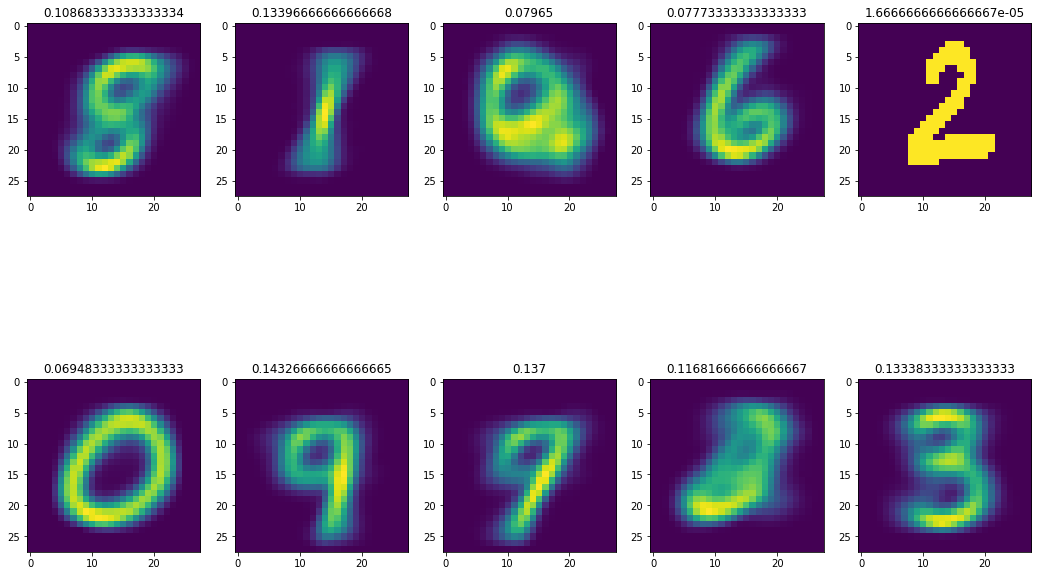

In [240]:
fig=plt.figure(figsize=[18, 12])
for i, subfigure in enumerate(mu):
  ax = fig.add_subplot(2, 5, i+1)
  plt.imshow(subfigure.reshape(28,28))
  ax.title.set_text(str(pi_k[i]))


So indeed this is not perfect, numbers are double (9) and some are missing (4,5,7). We try adding more classes, for instance to account for different styles of writing of 7.

In [243]:
K=15

mu=np.random.random((K,d)).astype(np.longdouble)
pi_in=np.random.random(K).astype(np.longdouble)
pi_k=pi_in/sum(pi_in)
epochs=30

mu, pi_k = classifier(x_data, mu, pi_k, epochs, batch_size=None)

Epoch  1 / 30
Epoch  2 / 30
Epoch  3 / 30
Epoch  4 / 30
Epoch  5 / 30
Epoch  6 / 30
Epoch  7 / 30
Epoch  8 / 30
Epoch  9 / 30
Epoch  10 / 30
Epoch  11 / 30
Epoch  12 / 30
Epoch  13 / 30
Epoch  14 / 30
Epoch  15 / 30
Epoch  16 / 30
Epoch  17 / 30
Epoch  18 / 30
Epoch  19 / 30
Epoch  20 / 30
Epoch  21 / 30
Epoch  22 / 30
Epoch  23 / 30
Epoch  24 / 30
Epoch  25 / 30
Epoch  26 / 30
Epoch  27 / 30
Epoch  28 / 30
Epoch  29 / 30
Epoch  30 / 30


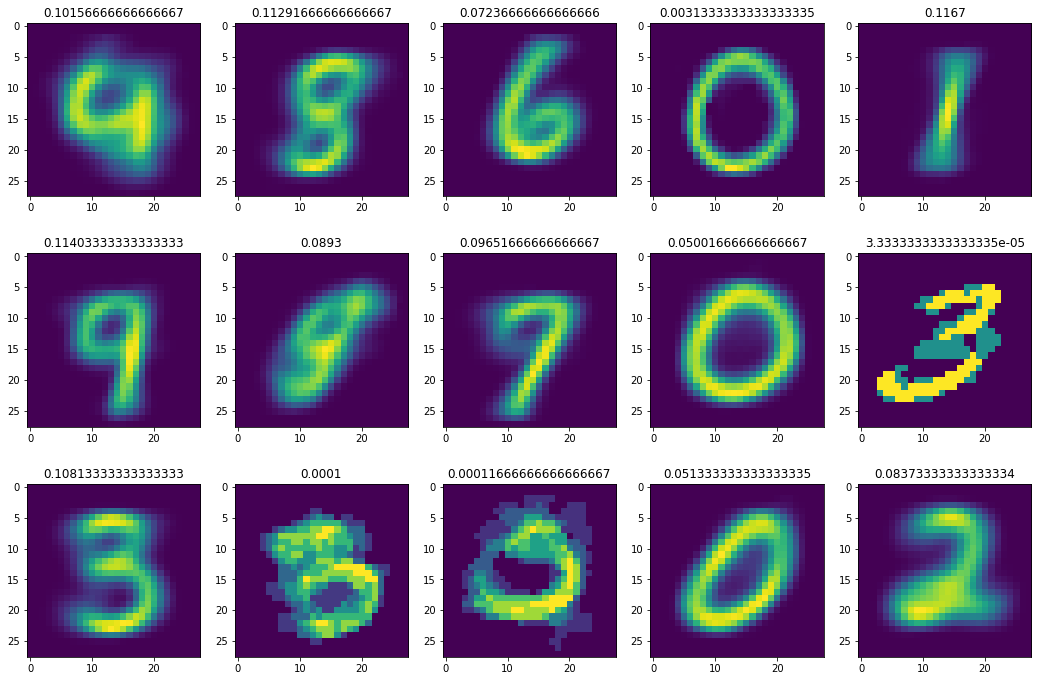

In [244]:
fig=plt.figure(figsize=[18, 12])
for i, subfigure in enumerate(mu):
  ax = fig.add_subplot(3, 5, i+1)
  plt.imshow(subfigure.reshape(28,28))
  ax.title.set_text(str(pi_k[i]))

This did not seem to improve, instead getting many copies, highlighting fundamental problems.